## 2. Redes Neurais

### Objetivos

  - Conhecer e praticar Redes Neurais MLP
  

## Batalha das redes 

Bem-vindos à nossa emocionante competição de Redes Neurais Multilayer Perceptron (MLP)! Hoje, vocês participarão de uma competição estilo Kaggle simplificada, projetada para colocar suas habilidades à prova e acelerar sua aprendizagem em um ambiente divertido e colaborativo.

Ao longo desta aula, vocês enfrentarão três rodadas de desafios, cada uma com um dataset de dificuldade crescente. O objetivo é criar e otimizar modelos de redes neurais MLP para resolver problemas de classificação. Vocês trabalharão em duplas para desenvolver as melhores soluções possíveis, competindo uns contra os outros para ver quem alcança o melhor desempenho.

A competição é estruturada da seguinte maneira:

 - Primeira rodada: Dataset fácil para que todos possam se familiarizar com o processo e começar a se aquecer.
 - Segunda rodada: Dataset de dificuldade média para desafiar suas habilidades e encorajá-los a explorar técnicas avançadas de otimização.
 - Terceira rodada: Dataset difícil, onde vocês colocarão à prova tudo o que aprenderam, desenvolvendo soluções para problemas complexos e realistas.
  
Vocês serão avaliados com base no desempenho de suas redes neurais e em critérios relacionados à arquitetura e complexidade da rede. Isso inclui métricas como acurácia, F1-Score e o número de neurônios usados no modelo. O objetivo é incentivar a criação de soluções eficientes e de alto desempenho.

Preparem-se para mergulhar no mundo das redes neurais e aprender através da experiência prática. A competição será acirrada, mas, no final, todos sairão ganhando com o conhecimento e as habilidades adquiridas. 


Boa sorte a todos e que vença a melhor solução!

## Descrição dos Datasets para as Rodadas de Competição

Ao longo desta competição, vocês enfrentarão três rodadas de desafios, cada uma com um dataset de dificuldade crescente. Abaixo estão as descrições dos datasets selecionados para cada rodada:

### Primeira rodada - Dataset fácil: Iris Dataset

O ``Iris dataset`` você já conhece, é um conjunto clássico de dados usado para problemas de classificação. Ele contém 150 amostras de flores de íris, divididas em 3 classes, cada uma representando um tipo de íris (Setosa, Versicolour e Virginica). Para cada amostra, há quatro características: comprimento e largura das sépalas e pétalas. 

O objetivo é criar um modelo MLP para classificar corretamente o tipo de íris com base nessas características.

Para carregar o Iris dataset:

In [13]:
## importa dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

def iris():
    iris = load_iris()
    X, y = iris.data, iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test


### Segunda rodada - Dataset médio: Heart Disease UCI Dataset

O ``Heart Disease UCI dataset`` é um conjunto de dados médicos que contém informações sobre pacientes e a presença de doenças cardíacas. São 303 amostras com 13 características, incluindo idade, sexo, pressão arterial em repouso e níveis de colesterol. 

O objetivo é classificar as amostras em duas classes: presença ou ausência de doença cardíaca.

Para carregar o Heart Disease UCI dataset:



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def heart():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
    columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

    heart_disease_data = pd.read_csv(url, header=None, names=columns, na_values="?")
    #valores ausentes (NaN), substitue pela média da coluna
    heart_disease_data.fillna(heart_disease_data.mean(), inplace=True)  

    X = heart_disease_data.drop('target', axis=1)
    y = heart_disease_data['target']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test

### Terceira rodada - Dataset difícil: Cifar10 Dataset

O ``cifar10`` é um conjunto de dados mais desafiador, contendo mais de 60.000 imagens em cores de 32x32 pixels, representando 10 classes de objetos capturados em imagens reais. 


link: [https://www.cs.toronto.edu/~kriz/cifar.html](https://www.cs.toronto.edu/~kriz/cifar.html)

O objetivo é criar um modelo MLP capaz de classificar corretamente cada imagem em seu respectivo dígito.

Para carregar o SVHN dataset:

In [4]:
import tensorflow as tf

def cifar():
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

    return X_train, X_test, y_train, y_test 

### Código base

O seu objetivo é a criação da rede MLP mais eficiente, este coódigo base te auxilia no restante. 

Para rodar, execute as celulas de código abaixo e faça as alterações onde for solicitado:


In [14]:
# Importação das bibliotecas necessárias
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical  

# importa as métricas de avaliação
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


### Primeiro passo

Aqui você deve escolhar do dataset. 

Defina o dataset de acordo com rodada da competição.

 - dataset = 'rodada1'   --> primeira rodada
 - dataset = 'rodada2'   --> primeira rodada
 - dataset = 'rodada3'   --> primeira rodada






In [31]:
### dataset da rodada, basta descomentar uma das linhas abaixo

#dataset = 'rodada1'
#dataset = 'rodada2'
dataset = 'rodada3'



# Função para carregar e preprocessar o dataset
def load_and_preprocess_data(dataset):
    if dataset == "rodada1":
        X_train, X_test, y_train, y_test = iris()
        
    elif dataset == "rodada2":
        X_train, X_test, y_train, y_test = heart()
        
    else:
        X_train, X_test, y_train, y_test = cifar()
        X_train = X_train.astype('float32')
        X_test = X_test.astype('float32')
        #normaliza os dados para o pixel ficar com valores entre 0 e 1
        X_train = X_train / 255.0
        X_test = X_test / 255.0 
       # print(y_train[0])
       # y_train = to_categorical(y_train, num_classes=10)
       # y_test = to_categorical(y_test, num_classes=10)
        print('shape original')
        print('X_train: {}, X_test: {}, y_train:{}, y_test:{}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))
        print('shape redimensionado, flatten')
        X_train = X_train.reshape(X_train.shape[0], -1)
        X_test = X_test.reshape(X_test.shape[0], -1)

    
    return X_train, X_test, y_train, y_test

# Carregue e preprocess os dados
X_train, X_test, y_train, y_test = load_and_preprocess_data(dataset)
print('X_train: {}, X_test: {}, y_train:{}, y_test:{}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

shape original
X_train: (50000, 32, 32, 3), X_test: (10000, 32, 32, 3), y_train:(50000, 1), y_test:(10000, 1)
shape redimensionado, flatten
X_train: (50000, 3072), X_test: (10000, 3072), y_train:(50000, 1), y_test:(10000, 1)


### Segundo passo

Crie sua rede neural MLP dentro da função create_model().

É aqui que você vai trabalhar! Use a função create_model() para definir a arquitetura da sua rede neural MLP.


### Dicas

- Adicione as camadas Densas, Dropout, etc.
- Adicione/altere quantidade de neuronios.
- Adicione/altere função de ativação ('relu','softmax','sigmoid')

Exemplos:
* model.add(Dense(18, activation='relu', input_shape=(4,)))
* model.add(Dropout(rate=0.5))
* model.add(BatchNormalization())

In [32]:
# Função para criar o modelo MLP
def create_model(dataset):
    model = Sequential()
    # Adicione as camadas aqui
    
  

    
    # Compile o modelo Não altera aqui, por enquanto.
    if dataset == 'rodada2': model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    else: model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Crie o modelo
print(dataset)
model = create_model(dataset)

model.summary()


rodada3
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                650       
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________


### Terceiro passo

Treine o seu modelo, aqui voce deve trabalhar para definir os parametros de treinamento da rede neural.

### Dicas

- Altere quantidade de epocas, batch_size e validation_split

In [33]:
# Treine o modelo
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 16s 12ms/step - loss: 1.8950 - accuracy: 0.3113 - val_loss: 1.7650 - val_accuracy: 0.3617
Epoch 2/10
1250/1250 [==============================] - 13s 11ms/step - loss: 1.7110 - accuracy: 0.3840 - val_loss: 1.6927 - val_accuracy: 0.3881
Epoch 3/10
1250/1250 [==============================] - 14s 11ms/step - loss: 1.6364 - accuracy: 0.4112 - val_loss: 1.6794 - val_accuracy: 0.3925
Epoch 4/10
1250/1250 [==============================] - 14s 11ms/step - loss: 1.5806 - accuracy: 0.4293 - val_loss: 1.5818 - val_accuracy: 0.4386
Epoch 5/10
1250/1250 [==============================] - 14s 12ms/step - loss: 1.5416 - accuracy: 0.4438 - val_loss: 1.5918 - val_accuracy: 0.4275
Epoch 6/10
1250/1250 [==============================] - 17s 13ms/step - loss: 1.5094 - accuracy: 0.4597 - val_loss: 1.5708 - val_accuracy: 0.4453
Epoch 7/10
1250/1250 [==============================] - 13s 11ms/step - loss: 1.4842 - accuracy: 0.4685 - val_loss: 1.5493 -

### Quarto passo

Avaliação do modelo treinado

In [34]:
#Validadção
train_loss, train_acc = model.evaluate(X_train,  y_train, verbose=2)
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

1563/1563 - 6s - loss: 1.3765 - accuracy: 0.5065
313/313 - 1s - loss: 1.4581 - accuracy: 0.4761


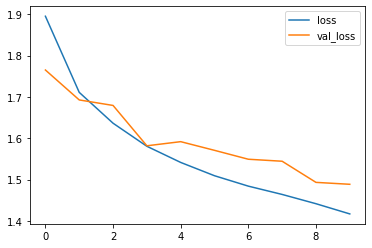

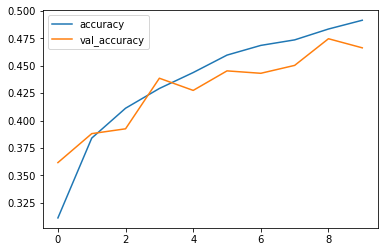

In [35]:
## exibe os graficos da função loss e acuracia

history_df = pd.DataFrame(history.history)

history_df[['loss','val_loss']].plot();
history_df[['accuracy','val_accuracy']].plot();


In [36]:
# Função para avaliar o modelo
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    
    
    # Faça previsões no conjunto de teste
    y_pred = np.argmax(model.predict(X_test), axis=-1)
    
    # Converta os rótulos para inteiros
    y_test = y_test.astype(int)
    y_pred = y_pred.astype(int)

    
    # Calcule as métricas de avaliação
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return accuracy, precision, recall, f1

# Treine e avalie o modelo
accuracy, precision, recall, f1 = train_and_evaluate_model(model, X_train, X_test, y_train, y_test)

# Exiba os resultados
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Revocação:", recall)
print("F1-Score:", f1)


Acurácia: 0.4761
Precisão: 0.48214241166222216
Revocação: 0.4761
F1-Score: 0.4730974839107123
